<a href="https://colab.research.google.com/github/anastasiaarsky/ML_Capstone/blob/main/ReproductionOfAvailableSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Potential Public Solutions**
The following is a summary of research papers/articles (with links) that focus on classifying spam emails. Since my dataset contains both the [SpamAssassin](https://spamassassin.apache.org/old/publiccorpus/) and [Enron Spam](https://www2.aueb.gr/users/ion/data/enron-spam/) datasets, this section will be split into two parts, each corresponding with one of the datasets.

### **Solution with the SpamAssassin dataset:**

#### **"[Email Spam Classification](https://medium.com/@yesprabhakaran98/email-spam-classification-92b661d3b700)"** by prabhakran98  (via medium.com):

***Dataset***:
- [SpamAssassin dataset](https://spamassassin.apache.org/old/publiccorpus/)

***Data Preprocessing***:
- Perform **TF-IDF** on the text corpus  
  >TF-IDF is an algorithm that uses the frequency of words to determine how relevant those words are to a given document.
  
***Model Training Techniques & Evaluation***:

| Model                     | Accuracy    | F 0.5 Score
| :-----------------------: | :---------: | :----------:
| **Random Forest**         | 0.98        | 0.98
| **XGBoost**               | 0.97        | 0.96
| **Decision Tree**         | 0.93        | 0.93
| **Logistic Regression**   | 0.93        | 0.93
| **Naive Bayes**           | 0.89        | 0.90
| **KNN**                   | 0.67        | 0.54

  >Notes:
  - All models included hyperparameter tuning using a grid search
  - F 0.5 Score is used as a metric (rather than F1 score) since the SpamAssassin dataset is imbalanced

  ***Conclusion***:  
  Ensemble Models perform better, especially the **Random Forest model**, as it had the highest accuracy and F 0.5 score.   
  However, all models acheive a 90+ score except for K Nearest Neighbor.

### **Solution with the Enron Spam dataset:**

#### **"[Empirical Analysis on Email Classification Using the Enron Dataset](https://towardsdatascience.com/empirical-analysis-on-email-classification-using-the-enron-dataset-19054d558697)"** by Suleka Helmini  (via towardsdatascience.com):
- [Github Code Link](https://github.com/suleka96/Email-Classification)

***Dataset***:
- [Enron Spam dataset](https://www2.aueb.gr/users/ion/data/enron-spam/)

***Data Preprocessing***:  
For the ML models:  
- Utilize a **bag-of-words** approach:  
> First, make a dictionary of the 3000 most common words in the corpus. Then iterate through the emails and record the occurence frequency of each token in the email corresponding to the token in the dictionary.

For the DL model (i.e. the Recurrent Neural Network):
- Utilize a slightly different **bag-of-words** approach:  
> First, create a dictionary of all the words in the corpus and index them starting from 1. Then iterate through the emails, and map each word to the corresponding index in the dictionary (this ensures the sequence of words is retained). Finally, to ensure all the emails have the same length, pad all the emails to the length of the longest email by adding 0's to the beginning of each sequence.

***Model Training Techniques & Evaluation***:

| ML Model                          | Accuracy | F1 Score| Recall|Precision     
| :-------------------------------: | :-------:| :-----: | :----:| :------:
| **Logistic Regression**           | 0.973    | 0.969   | 0.972 | 0.966
| **Random Forest Classifier**      | 0.971    | 0.966   | 0.969 | 0.964
| **Support Vector Classification** | 0.958    | 0.952   | 0.962 | 0.943


> Notes:
  - All ML models included manual hyperparameter tuning

| DL Model                             | Accuracy  | F1 Score| Recall|Precision
| :----------------------------------: | :-------: | :-----: | :----:| :------:
| **Recurrent Neural Network (LSTM)**  | 0.981     | 0.980   | 0.980 | 0.981
> Notes:
  - Cost function: softmax cross entropy with logits
  - Optimization function: Adam optimizer
  - Activation function: sigmoid

  ***Conclusion***:  
  Logistic Regression outperformed all of the ML Models, but the **RNN model** outperformed the logistic regression algorithm because of its ability to model long term dependencies.

# **Reproduction of Available Solutions**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import time
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [3]:
# Load clean data into a pandas dataframe
DATA_PATH = "/content/drive/My Drive/UCSD Machine Learning Engineering Bootcamp/Capstone Project/"
df = pd.read_csv(DATA_PATH + 'CleanData.csv')

In [20]:
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### **Reproduction of SpamAssassin dataset Solution:**
(TF-IDF for the preprocessing, and a Random Forest model for the training)

****NOTE**: the article did not have a link to the code, so I had to code it myself

In [5]:
df1 = df

#### Step 1: TF-IDF

In [6]:
# TF-IDF

# initialize the tfidf vectorizer
tfidf_vec = TfidfVectorizer(max_features=10000)
# convert Clean_Text to numbers with TfidfVectorizer
tfidf = tfidf_vec.fit_transform(df1['Clean_Text'])

In [7]:
# convert the tfidf data features to array
tfidf = tfidf.toarray()
# show shape of the feature vector
tfidf.shape

(39763, 10000)

#### Step 2: Preliminary Random Forest model

In [8]:
# Split data into training and testing set
X_idf = tfidf
y = df1.Label
X_train, X_test, y_train, y_test = train_test_split(X_idf, y, test_size=0.3, shuffle=True)

Preliminary Random Forest Results:
Test accuracy: 0.982
F1 Score: 0.982
Recall: 0.982
Precision: 0.981


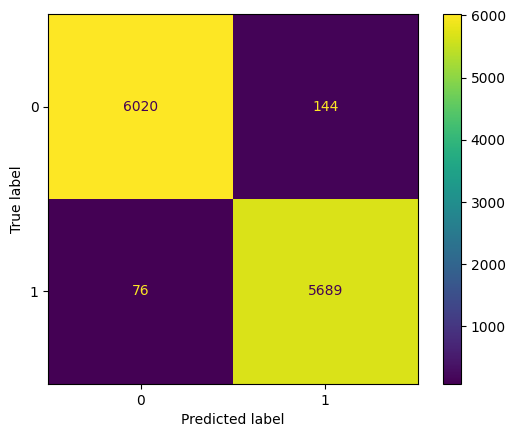

In [9]:
# Random Forest: initial fitting

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier to the data
rf.fit(X_train, y_train)

# Generate Predictions
y_pred = rf.predict(X_test)

# Print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Preliminary Random Forest Results:")
print("Test accuracy: {:.3f}".format(accuracy))
print("F1 Score: {:.3f}".format(f1))
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [10]:
# Look at parameters used by our current random forest
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Step 3: Random Forest Hyperparameter Tuning

In [22]:
# Random Forest: hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [13]:
# Use the random grid to search for best hyperparameters

# Keep track of time elapsed
start = time.time()

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters, using 3 fold cross validation
# across 100 different combinations
grid_search = RandomizedSearchCV(rf,
                                 param_distributions = random_grid,
                                 n_iter=20,
                                 cv=3,
                                 verbose=3)

# Fit the random search object to the data
grid_search.fit(X_train, y_train)

total_time = time.time() - start
print("Elapsed time: {:.3f}".format(total_time))
print("In hours & minutes: \t", str(datetime.timedelta(seconds = total_time)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.961 total time= 1.1min
[CV 2/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.956 total time= 1.1min
[CV 3/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.956 total time= 1.1min
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.976 total time= 3.0min
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.974 total time= 3.0min
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.973 total time= 3.0min
[CV 1/3] 

In [14]:
grid_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [26]:
# Tuned model metrics
start = time.time()

# Fit the tuned random forest model and generate predictions
rf_tuned = RandomForestClassifier(n_estimators = 200, min_samples_split = 10,
                                     min_samples_leaf =  1, max_features = 'sqrt',
                                     max_depth = 90, bootstrap = False)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

# generate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Tuned Random Forest Results:")
print("Test accuracy: {:.3f}".format(accuracy))
print("F1 Score: {:.3f}".format(f1))
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))

total_time = time.time() - start
print("Elapsed time: {:.3f} s".format(total_time))
print("In hours & minutes: \t", str(datetime.timedelta(seconds = total_time)))

Tuned Random Forest Results:
Test accuracy: 0.980
F1 Score: 0.980
Recall: 0.981
Precision: 0.980
Elapsed time: 279.844 s
In hours & minutes: 	 0:04:39.843724


Unfortunately, none of the Randomized Grid Search's random models acheived a higher score than the preliminary model (that used the default hyperparameters). The best model in the Randomized Grid Search achieved an accuracy of 0.980 compared to the accuracy of 0.982 of the preliminary model.

#### Random Forest Results

In [25]:
# Random Forest model metrics

start = time.time()

# Fit the random forest model and generate predictions
rf_final = RandomForestClassifier()
rf_final.fit(X_train, y_train)
y_pred = rf_final.predict(X_test)

# generate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Random Forest Results:")
print("Test accuracy: {:.3f}".format(accuracy))
print("F1 Score: {:.3f}".format(f1))
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))

total_time = time.time() - start
print("Elapsed time: {:.3f} s".format(total_time))
print("In hours & minutes: \t", str(datetime.timedelta(seconds = total_time)))

Random Forest Results:
Test accuracy: 0.982
F1 Score: 0.982
Recall: 0.982
Precision: 0.982
Elapsed time: 97.344 s
In hours & minutes: 	 0:01:37.343967


My **Random Forest model acheived an accuracy, F1 score, and precision of 0.981, and a recall of 0.982**. This model's performance is roughly identical to the performance of the Random Forest model used in the article for the SpamAssassin dataset.

### Reproduction of Enron Spam dataset Solution:
(Bag of words for the preprocessing, and a RNN (LSTM) model for the training)

****NOTE**: the article did have a [Github link](https://github.com/suleka96/Email-Classification/blob/master/Enron_LSTM.py) to the code, so I just copy and pasted it and ensured that all the tensorflow methods were up to date

In [12]:
df2 = df

In [13]:
# Ensure the runtime is set to GPU (V100)
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.12.0
Found GPU at: /device:GPU:0


#### Bag of Words model

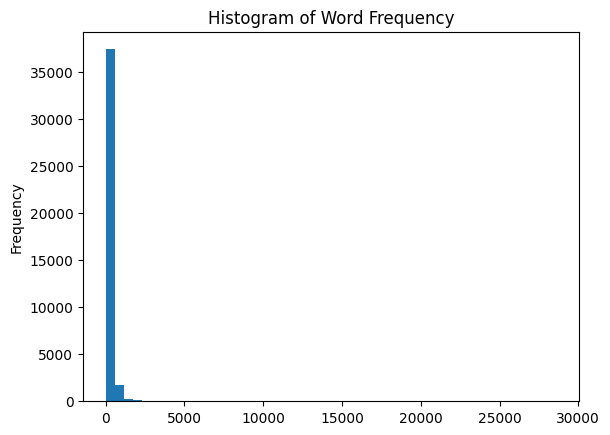

In [14]:
# Histogram of word frequency per email

email_length = df2['Clean_Text'].str.split().apply(len)
plt.hist(email_length, bins=50)
plt.gca().set(title='Histogram of Word Frequency', ylabel='Frequency');

In [15]:
print("Longest email length: ", df2['Clean_Text'].str.split().apply(len).max())
print("Average email length: ", df2['Clean_Text'].str.split().apply(len).mean())
print("99th quantile email length: ", df2['Clean_Text'].str.split().apply(len).quantile(q=0.99))

Longest email length:  28624
Average email length:  201.44086210798983
99th quantile email length:  1568.0


The original code pads all the emails to the length of the longest email by adding 0's to the beginning of each sequence. This ensures all the emails have the same length.

However, the longest email is 28,624 words long while the average email is only 201.4 words long, so I decided to pad all the email lengths to the 99th quantile (1,568 words) in my Bag of Words model.

In [16]:
# Method to preprocess data
# (heavily modified from the original code)

def pre_process(df):
    # shuffle data
    df = df.sample(frac = 1).reset_index(drop=True)

    # word_freq --> dictionary of all the words and their frequencies
    word_freq = Counter()
    df['Clean_Text'].apply(lambda x: word_freq.update(x.split()))

    # sorted_words --> a list of all unique words, sorted by frequency
    sorted_words = sorted(word_freq, key=word_freq.get, reverse=True)

    # vocab_to_int --> dictionary that maps each word to a unique integer
    vocab_to_int = {c: i for i, c in enumerate(sorted_words, 1)}

    # use the vocab_to_int dictionary to create a new column called BoW (bag of words)
    # maps each word to the corresponding index
    df['BoW'] = df['Clean_Text'].str.split(" ")
    df['BoW'] = df.BoW.apply(lambda row: [vocab_to_int[i] for i in row if vocab_to_int.get(i)])

    # pad all the email lengths to the 99th quantile (1,568 words) by adding 0's
    # to the beginning of each sequence
    seq_length = int(df['BoW'].apply(len).quantile(q=0.99))

    features = np.zeros([len(df), seq_length], dtype=int)
    for i, row in enumerate(df['BoW']):
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features, np.array(df.Label), sorted_words

#### RNN (LSTM) model

In [17]:
# Method to get data with the same batch size

def get_batches(x, y, batch_size=100):
    n_batches = len(x) // batch_size
    x, y = x[:n_batches * batch_size], y[:n_batches * batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii + batch_size], y[ii:ii + batch_size]

In [18]:
# Train and test the RNN model

def train_test(df):
    start = time.time()

    # -----------------Train/Validation/Test Split------------------------------
    start_split = time.time()

    # set features and labels
    features, labels, sorted_words = pre_process(df)

    split_frac1 = 0.8

    idx1 = int(len(features) * split_frac1)
    train_x, val_x = features[:idx1], features[idx1:]
    train_y, val_y = labels[:idx1], labels[idx1:]

    split_frac2 = 0.5

    idx2 = int(len(val_x) * split_frac2)
    val_x, test_x = val_x[:idx2], val_x[idx2:]
    val_y, test_y = val_y[:idx2], val_y[idx2:]

    print("-----------------Train/Validation/Test Split-----------------\n")
    print("\nFeature Shapes:")
    print("Train set: \t\t{}".format(train_x.shape),
          "\nValidation set: \t{}".format(val_x.shape),
          "\nTest set: \t\t{}".format(test_x.shape))

    print("\nLabel Shapes:")
    print("Train set: \t\t{}".format(train_y.shape),
          "\nValidation set: \t{}".format(val_y.shape),
          "\nTest set: \t\t{}".format(test_y.shape))

    split_time = time.time() - start_split
    print("\nTime Elapsed: \t\t{:.3f} s\n".format(split_time))

    # -----------------Initialize Values----------------------------------------

    start_initialize = time.time()

    # set LSTM variables
    epochs = 15
    lstm_layers = 1
    batch_size = 179
    lstm_size = 30
    learning_rate = 0.003

    # set number of unique words
    n_words = len(sorted_words) + 1

    print("\n---------------Initialized Values--------------------------\n")
    print("Number of unique words: \t{}".format(n_words),
          "\nLSTM size: \t\t\t{}".format(lstm_size),
          "\nLSTM layers: \t\t\t{}".format(lstm_layers),
          "\nBatch size: \t\t\t{}".format(batch_size),
          "\nEpochs: \t\t\t{}".format(epochs),
          "\nLearning Rate \t\t\t{}".format(learning_rate))

    initialize_time = time.time() - start_initialize
    print("\nTime Elapsed: \t\t{:.3f} s\n".format(initialize_time))

    # -----------------Placeholders---------------------------------------------

    graph = tf.Graph()

    with graph.as_default():

        tf.random.set_seed(1)

        inputs_ = tf.compat.v1.placeholder(tf.int32, [None, None], name="inputs")
        labels_ = tf.compat.v1.placeholder(tf.float32, [None, None], name="labels")

        keep_prob = tf.compat.v1.placeholder(tf.float32, name="keep_prob")

        embed_size = 300

        embedding = tf.Variable(tf.random.uniform((n_words, embed_size), -1, 1))
        embed = tf.compat.v1.nn.embedding_lookup(embedding, inputs_)

        #print(embedding.shape)
        #print(embed.shape)

        lstm = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(lstm_size)

        drop = tf.compat.v1.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob)

        cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell([drop] * lstm_layers)

        initial_state = cell.zero_state(batch_size, tf.float32)

        outputs, final_state = tf.compat.v1.nn.dynamic_rnn(cell, embed,
                                                 initial_state=initial_state)

        hidden1 = tf.compat.v1.layers.dense(outputs[:, -1], units=25, activation=tf.nn.relu)

        hidden2 = tf.compat.v1.layers.dense(hidden1, units=15, activation=tf.nn.relu)

        logit = tf.compat.v1.layers.dense(hidden2, units=1, activation=None)

        cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=logit, labels=labels_))

        optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(cost)

        predictions = tf.round(tf.nn.sigmoid(logit))

        saver = tf.compat.v1.train.Saver()

    # -----------------Training-------------------------------------------------

    print("\n-----------------Training----------------------------------\n")

    start_train = time.time()

    with tf.compat.v1.Session(graph=graph) as sess:
        print("Starting Training...")
        tf.random.set_seed(1)
        sess.run(tf.compat.v1.global_variables_initializer())
        iteration = 1
        for e in range(epochs):
            state = sess.run(initial_state)
            for ii, (x, y) in enumerate(get_batches(np.array(train_x),
                                            np.array(train_y), batch_size), 1):

                feed = {inputs_: x,
                        labels_: y[:, None],
                        keep_prob: 0.5,
                        initial_state: state}
                loss, states, _ = sess.run([cost, final_state, optimizer],
                                           feed_dict=feed)

                if iteration % 5 == 0:
                    print("\nEpoch: {}/{}".format(e, epochs),
                          "Iteration: {}".format(iteration),
                          "Train loss: {:.3f}".format(loss))
                iteration += 1

        train_time = time.time() - start_train
        print("\nTime Elapsed: \t\t{:.3f} s".format(train_time))
        print("In hours & minutes: \t", str(datetime.timedelta(seconds = train_time)))

        saver.save(sess, "checkpoints/sentiment.ckpt")

    # -----------------Testing Validation Set-----------------------------------
    print("Starting Validation Set...")

    start_valid = time.time()

    prediction_vals = []
    y_vals = []
    with tf.compat.v1.Session(graph=graph) as sess:
        tf.random.set_seed(1)
        saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))

        test_state = sess.run(cell.zero_state(batch_size, tf.float32))

        for ii, (x, y) in enumerate(get_batches(np.array(val_x), np.array(val_y),
                                                batch_size), 1):

            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 1,
                    initial_state: test_state}

            prediction = sess.run(predictions, feed_dict=feed)
            prediction = prediction.astype(int)

            for i in range(len(prediction)):
                prediction_vals.append(prediction[i][0])
                y_vals.append(y[i])

        accuracy = accuracy_score(y_vals, prediction_vals)
        f1 = f1_score(y_vals, prediction_vals, average='macro')
        recall = recall_score(y_true=y_vals, y_pred=prediction_vals, average='macro')
        precision = precision_score(y_vals, prediction_vals, average='macro')

        print("\n-----------------Testing Validation Set----------------\n")
        print("Test accuracy: {:.3f}".format(accuracy))
        print("F1 Score: {:.3f}".format(f1))
        print("Recall: {:.3f}".format(recall))
        print("Precision: {:.3f}".format(precision))

        valid_time = time.time() - start_valid
        print("\nTime Elapsed: \t\t{:.3f} s\n".format(valid_time))


    # -----------------Testing Test Set-----------------------------------------
    print("Starting Testing Set...")

    start_test = time.time()

    prediction_val = []
    y_val = []
    with tf.compat.v1.Session(graph=graph) as sess:
        tf.random.set_seed(1)
        saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
        test_state = sess.run(cell.zero_state(batch_size, tf.float32))

        for ii, (x, y) in enumerate(get_batches(np.array(test_x),
                                                np.array(test_y), batch_size), 1):

            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 1,
                    initial_state: test_state}

            prediction = sess.run(predictions, feed_dict=feed)
            prediction = prediction.astype(int)

            for i in range(len(prediction)):
                prediction_val.append(prediction[i][0])
                y_val.append(y[i])

        accuracy = accuracy_score(y_val, prediction_val)
        f1 = f1_score(y_val, prediction_val, average='macro')
        recall = recall_score(y_true=y_val, y_pred=prediction_val, average='macro')
        precision = precision_score(y_val, prediction_val, average='macro')

        print("\n-----------------Testing Test Set----------------------\n")
        print("Test accuracy: {:.3f}".format(accuracy))
        print("F1 Score: {:.3f}".format(f1))
        print("Recall: {:.3f}".format(recall))
        print("Precision: {:.3f}".format(precision))

        test_time = time.time() - start_test
        print("\nTime Elapsed: \t\t{:.3f} s\n".format(test_time))

        total_time = time.time() - start
        print("\n=======================================================\n")
        print("\nTotal Time Elapsed: \t\t{:.3f} s\n".format(total_time))
        print("In hours & minutes: \t", str(datetime.timedelta(seconds = total_time)))

In [21]:
train_test(df2)

-----------------Train/Validation/Test Split-----------------


Feature Shapes:
Train set: 		(31810, 1568) 
Validation set: 	(3976, 1568) 
Test set: 		(3977, 1568)

Label Shapes:
Train set: 		(31810,) 
Validation set: 	(3976,) 
Test set: 		(3977,)

Time Elapsed: 		4.764 s


---------------Initialized Values--------------------------

Number of unique words: 	256564 
LSTM size: 			30 
LSTM layers: 			1 
Batch size: 			179 
Epochs: 			15 
Learning Rate 			0.003

Time Elapsed: 		0.000 s


-----------------Training----------------------------------

Starting Training...

Epoch: 0/15 Iteration: 5 Train loss: 0.688

Epoch: 0/15 Iteration: 10 Train loss: 0.629

Epoch: 0/15 Iteration: 15 Train loss: 0.586

Epoch: 0/15 Iteration: 20 Train loss: 0.563

Epoch: 0/15 Iteration: 25 Train loss: 0.591

Epoch: 0/15 Iteration: 30 Train loss: 0.459

Epoch: 0/15 Iteration: 35 Train loss: 0.362

Epoch: 0/15 Iteration: 40 Train loss: 0.324

Epoch: 0/15 Iteration: 45 Train loss: 0.196

Epoch: 0/15 Iteration:

My **RNN model acheived an accuracy, F1 score, and recall of 0.981, and a recall of 0.982**. This model's performance is roughly identical to the performance of the RNN model used in the article for the Enron Spam dataset.

# **Analysis and Conclusion**

### **Results**:
| Model                             | Accuracy | F1 Score| Recall|Precision     
| :-------------------------------:  | :-------:| :-----: | :----:| :------:
| **Random Forest**                  | 0.981    | 0.981   | 0.981 | 0.982
| **Recurrent Neural Network (LSTM)**| 0.981    | 0.981   | 0.981 | 0.982

**Both models obtained identical accuracy, F1 score, recall, and precision metrics.** The accuracy of both models was 98.1%, which is very high.

#### **Analysis**
**When considering the time taken train, the Random Forest model outperformed the RNN (LSTM) model**. The Random Forest model took 1 minute and 37 seconds to run, while the RNN model took around 1 hour and 37 minutes. So the RNN model took rougly 100 times the amount of time to obtain the exact same results.

#### **Conclusion**

Moving forward, I first want to **explore other ensemble methods**, specifically boosting methods like XGBoost/AdaBoost or even CatBoost. Ensemble methods are less complex and faster to train compared to deep learning methods, so they are preferred if they are able to achieve comparable results.

Next, I want to **experiment further with deep learning models**. I first want to tune the hyperparameters for the RNN model I implemented, as well as look into adding additional hidden layers to improve its results. I am also considering implementing a Convolutional Neural Network (CNN) as they are faster than RNNs and highly proficient in extracting meaningful patterns, which is ideal for spam detection.

Finally, I want to **experiment with other forms of feature extraction**. So far I have tried TF-IDF Vectorization and a modified Bag of Words model, but I also want to consider Count Vectorization, Word2Vec, and possibly Word Embeddings.